In [1]:


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import pickle
import joblib
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



In [2]:
x,y=[],[]

with open('Data/SMSSpamcollection.txt','r') as file:
    data=file.read()
    for data_item in data.split('\n'):
        if len(data_item.split('\t'))==2:
            y.append(data_item.split('\t')[0])
            x.append(data_item.split('\t')[1])
print("Successfully read the data from text file and splitted into X and Y")

Successfully read the data from text file and splitted into X and Y


In [3]:
len(x),len(y)


(5574, 5574)

In [4]:
data_dict={'mail_message':x,'label':y}
df=pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:


for i in range(0,len(df)):



    mesage=re.sub('[^a-zA-Z]',' ',df['mail_message'][i])
    mesage=mesage.lower()
    df['mail_message'][i]=mesage
df.head()

,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham


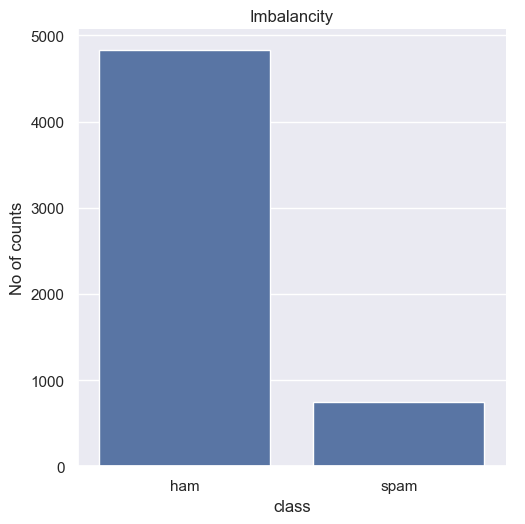

In [8]:
classs=list(df['label'].value_counts().index)
valu=list(df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Imbalancity')
plt.xlabel('class')
plt.ylabel("No of counts")
plt.show()

In [9]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [10]:
df.sample(2000)

,mail_message,label
5419,nope i just forgot will show next week,ham
2826,congratulations thanks to a good friend u ha...,spam
4829,lol no just trying to make your day a little ...,ham
2231,hey thk we juz go accordin to wat we discus...,ham
455,loan for any purpose homeown...,spam
...,...,...
395,pick you up bout ish what time are and t...,ham
201,i sent you lt gt bucks,ham
1283,ever green quote ever told by jerry in cartoon...,ham
2489,aiyah e rain like quite big leh if drizzling ...,ham


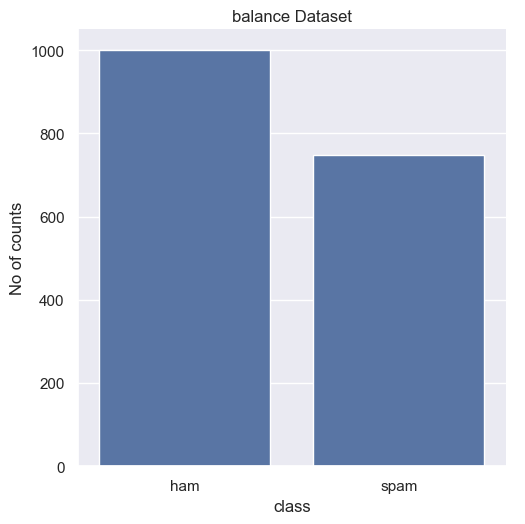

In [11]:
ham=df[df['label']=='ham'].sample(1000)  #filtering the dataset

spam=df[df['label']=='spam']
balance_df=pd.concat([ham,spam]) #combining of the spam and ham

classs=list(balance_df['label'].value_counts().index)
valu=list(balance_df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('balance Dataset')
plt.xlabel('class')
plt.ylabel("No of counts")
plt.show()

In [12]:
balance_df['label']=balance_df['label'].map({'ham':0,'spam':1})


In [13]:
balance_df.isnull().sum()


mail_message    0
label           0
dtype: int64

In [14]:
balance_df.duplicated().sum()

132

In [15]:
print(f'Duplicates in our dataset are:{balance_df.duplicated().sum()}')
print(f'shape of our data set before remove duplicates:{balance_df.shape}')

Duplicates in our dataset are:132
shape of our data set before remove duplicates:(1747, 2)


In [16]:
balance_df.drop_duplicates(inplace=True)

In [17]:
#after removing the duplicates
print(f'Duplicates in our dataset are:{balance_df.duplicated().sum()}')
print(f'shape of our data set before remove duplicates:{balance_df.shape}')

Duplicates in our dataset are:0
shape of our data set before remove duplicates:(1615, 2)


In [18]:
x=balance_df['mail_message']
y=balance_df['label']


In [19]:
x.head()

1703                    i have lost    kilos as of today 
4974    oops i was in the shower when u called  hey a ...
5057           goodnight da thangam i really miss u dear 
2314                              so what do you guys do 
3373               and now electricity just went out fml 
Name: mail_message, dtype: object

In [20]:
y.head()

1703    0
4974    0
5057    0
2314    0
3373    0
Name: label, dtype: int64

In [21]:
x=x.values
# print(x[0:5])
x[0:5]


array(['i have lost    kilos as of today ',
       'oops i was in the shower when u called  hey a parking garage collapsed at university hospital  see i m not crazy  stuff like that does happen ',
       'goodnight da thangam i really miss u dear ',
       'so what do you guys do ',
       'and now electricity just went out fml '], dtype=object)

In [22]:
print(x.shape)

(1615,)


In [23]:
#initializing the bag of word class 
BOW_obj=CountVectorizer(max_features=2000,stop_words='english')
print(BOW_obj)

CountVectorizer(max_features=2000, stop_words='english')


In [24]:
x.shape,type(x)


((1615,), numpy.ndarray)

In [25]:
x_transformed=BOW_obj.fit_transform(x)


In [26]:
x_transformed

<1615x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 12444 stored elements in Compressed Sparse Row format>

In [27]:
dense_matrix=x_transformed.toarray()
dense_matrix.shape

(1615, 2000)

In [28]:
# joblib.dump('BOW_obj','vectorizer.pkl')

In [29]:
x=dense_matrix
x.shape,y.shape

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
MNB=MultinomialNB()



MNB.fit(x_train,y_train)

MultinomialNB()

In [31]:
MNB.score(x_test,y_test)

0.9721362229102167

In [32]:
pred=MNB.predict(x_test)
pred


array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [33]:
cm=confusion_matrix(y_test,pred)


<Axes: >

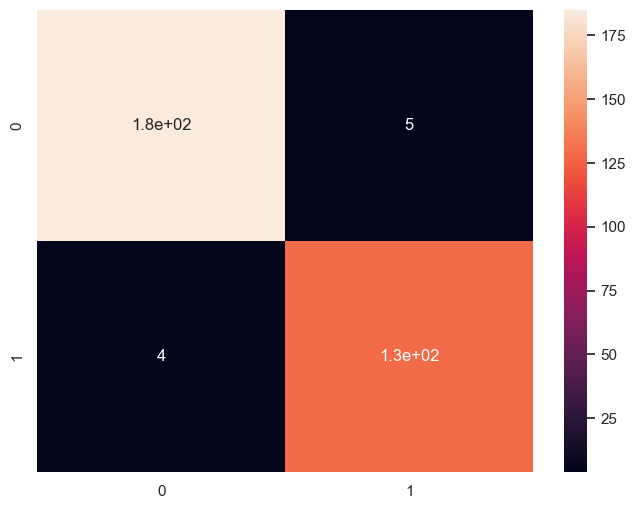

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)

In [35]:
print(classification_report(y_test,pred)) #it made between the  test data and the predicted values from the test 
#data of the data set

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       190
           1       0.96      0.97      0.97       133

    accuracy                           0.97       323
   macro avg       0.97      0.97      0.97       323
weighted avg       0.97      0.97      0.97       323



In [36]:
pickle.dump(BOW_obj,open('vectorizer.pkl','wb'))
            

In [37]:
pickle.dump(MNB,open('spamclassifier_MnB.pkl','wb'))


In [38]:
model=pickle.load(open('spamclassifier_MnB.pkl','rb'))  #for loading the data from the directory


In [39]:
compare_dict={'actual':y_test,'pred':pred}
comparision_df=pd.DataFrame(compare_dict)
comparision_df.head(10)

,actual,pred
2970,0,0
1221,1,1
1904,1,1
1433,0,0
5,1,1
415,1,1
4166,1,1
3471,0,0
529,1,1
1396,0,0


In [43]:
import sklearn 
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)
import flask  
print(flask.__version__)


1.26.4
2.2.2
1.5.0
3.0.3
